In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
wc = 1 * 2*pi
wa = 1 * 2*pi
gamma = 0.05
g = gamma * 2*pi
N = 15
kappa = 0.005
n_th_a = 1.0


a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
sz = tensor(qeye(N),sigmaz())

H = wc*a.dag()*a + wa*sm.dag()*sm + g*(a.dag()*sm + a*sm.dag())

In [3]:
tlist = linspace(0,50,200)

In [4]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)

In [5]:
psi0 = tensor(basis(N,0),basis(2,1))  # start with an excited atom
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

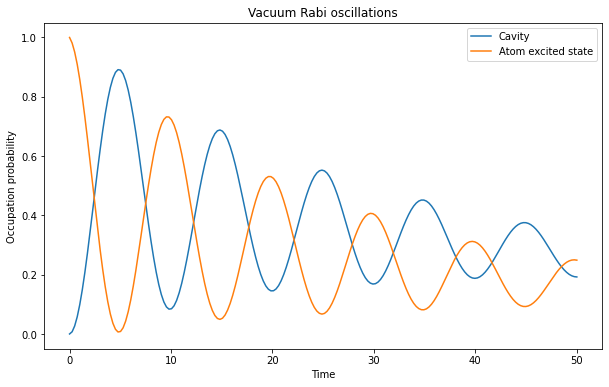

In [6]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')